In [1]:
pip install --upgrade jupyter notebook


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.  Downloading notebook-7.3.2-py3-none-any.whl (13.2 MB)
  Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl (438 kB)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SHAMEEM\\AppData\\Roaming\\Python\\Python39\\site-packages\\~inpty\\winpty.cp39-win_amd64.pyd'
Check the permissions.



  Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl (134 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl (18 kB)
  Attempting uninstall: pywinpty
    Found existing installation: pywinpty 1.1.6
    Uninstalling pywinpty-1.1.6:
      Successfully uninstalled pywinpty-1.1.6


# 1. Import Necessary libraries

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

# 2. Loading the Data:

In [2]:
import zipfile
import pandas as pd

# Define paths to the ZIP files
train_zip_path = r"D:\Microsofr_Class\Dataset\GUIDE_Train.csv.zip"
test_zip_path = r"D:\Microsofr_Class\Dataset\GUIDE_Test.csv.zip"

# Define the extraction directory
extract_dir = r"D:\Microsofr_Class"

# Extract the training ZIP file
with zipfile.ZipFile(train_zip_path, 'r') as train_zip:
    train_zip.extractall(extract_dir)
    print(f"Extracted: {train_zip.namelist()}")

# Extract the testing ZIP file
with zipfile.ZipFile(test_zip_path, 'r') as test_zip:
    test_zip.extractall(extract_dir)
    print(f"Extracted: {test_zip.namelist()}")

# Paths to the extracted CSV files
train_csv_path = r"D:\Microsofr_Class\GUIDE_Train.csv"
test_csv_path = r"D:\Microsofr_Class\GUIDE_Test.csv"

# Read the CSV files into pandas DataFrames
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Display the first few rows of each dataset
print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())


Extracted: ['GUIDE_Train.csv']
Extracted: ['GUIDE_Test.csv']
Training Data:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

In [3]:
# # Now reading the unzipped CSV files
train_data


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


### 3.  Understanding the Data:


##### Dataset Overview:
- GUIDE_Train.csv with 9.5M rows and 45 columns.
- GUIDE_Test.csv with 4.1M rows and 46 columns.

In [5]:
def optimize_memory(df):
    # Downcast numerical columns (int & float separately)
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    
    # Convert object columns to category type
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    
    return df


## Chunk Processing with Memory Optimization

In [6]:
# Initialize variables
chunks = []
train_dataset = r"D:\Microsofr_Class\GUIDE_Train.csv"  # Your dataset path



# Reading the dataset in chunks and processing each chunk
for chunk in pd.read_csv(train_dataset, chunksize=500000, low_memory=False):
    chunk = optimize_memory(chunk)  # Optimize memory usage for each chunk
    chunks.append(chunk)  # Append processed chunk to the list
    
    

# Concatenate all chunks into a single DataFrame
train_data = pd.concat(chunks, ignore_index=True)
# Merges all processed chunks into a single DataFrame.



# Clean up memory
# Deletes the chunks[] list to free up RAM after merging the dataset.
del chunks

# Display memory usage and preview the data
print("Memory usage after optimization:")
print(train_data.info(memory_usage='deep'))

# Preview the first few rows of the optimized DataFrame
print("First few rows of the optimized DataFrame:")
print(train_data.head())

Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  int64   
 1   OrgId               int16   
 2   IncidentId          int32   
 3   AlertId             int32   
 4   Timestamp           object  
 5   DetectorId          int16   
 6   AlertTitle          int32   
 7   Category            object  
 8   MitreTechniques     object  
 9   IncidentGrade       category
 10  ActionGrouped       object  
 11  ActionGranular      object  
 12  EntityType          object  
 13  EvidenceRole        category
 14  DeviceId            int32   
 15  Sha256              int32   
 16  IpAddress           int32   
 17  Url                 int32   
 18  AccountSid          int32   
 19  AccountUpn          int32   
 20  AccountObjectId     int32   
 21  AccountName         int32   
 22  DeviceName          int32   
 23 

In [7]:
train_data.head()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [8]:
print(train_data.shape)


(9516837, 45)


In [9]:
train_data.columns


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [10]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  int64   
 1   OrgId               int16   
 2   IncidentId          int32   
 3   AlertId             int32   
 4   Timestamp           object  
 5   DetectorId          int16   
 6   AlertTitle          int32   
 7   Category            object  
 8   MitreTechniques     object  
 9   IncidentGrade       category
 10  ActionGrouped       object  
 11  ActionGranular      object  
 12  EntityType          object  
 13  EvidenceRole        category
 14  DeviceId            int32   
 15  Sha256              int32   
 16  IpAddress           int32   
 17  Url                 int32   
 18  AccountSid          int32   
 19  AccountUpn          int32   
 20  AccountObjectId     int32   
 21  AccountName         int32   
 22  DeviceName          int32   
 23  NetworkMessageId    int32   
 24

In [11]:
train_data.describe()


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


# Handling Missing Data

### 1️⃣ Check Missing Values

In [12]:
train_data.isnull().sum()


Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

### 2️⃣ Drop Columns with More Than 50% Missing Values

In [13]:
# Droping Columns with More Than 50% Missing Values:
missing_percentage = train_data.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
train_data.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"Columns dropped due to >50% missing values: {columns_to_drop.tolist()}")

Columns dropped due to >50% missing values: ['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']


 'IncidentGrade', Since this is our target column, we cannot have missing values here.

 The best option is to drop rows where the IncidentGrade is missing, as imputing the target variable might lead to misleading results.

### 3️⃣ Drop Rows Where IncidentGrade is Missing

In [14]:
# Droping rows where 'IncidentGrade' is missing
train_data = train_data.dropna(subset=['IncidentGrade'])

### 4️⃣ Check & Drop Duplicate Rows

In [15]:
train_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [16]:
train_data.duplicated().sum()

542692

In [17]:
# Droping duplicate rows from the dataset
train_data = train_data.drop_duplicates()

print(f"Number of rows after removing duplicates: {train_data.shape[0]}")

Number of rows after removing duplicates: 8922805


### 5️⃣ Check Target Variable (IncidentGrade) Distribution

In [18]:
# Target variable distribution
print("Target variable distribution:")
train_data['IncidentGrade'].value_counts()

Target variable distribution:


BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: IncidentGrade, dtype: int64

### 6️⃣ Visualize Target Variable Distribution

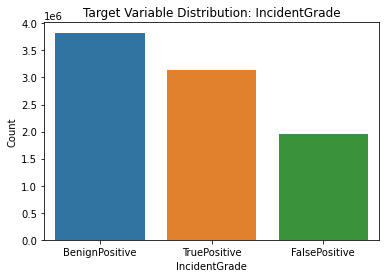

In [19]:
sns.countplot(data=train_data, x='IncidentGrade', order=train_data['IncidentGrade'].value_counts().index)
plt.title('Target Variable Distribution: IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

In [20]:
print(f"Number of rows after removing duplicates: {train_data.shape[0]}")


Number of rows after removing duplicates: 8922805


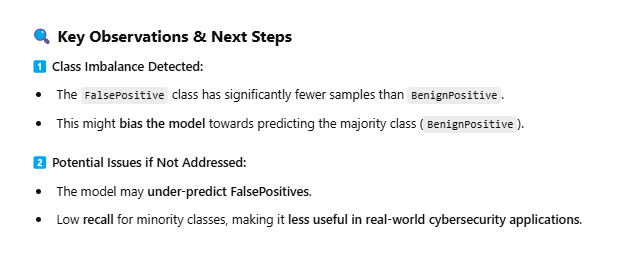

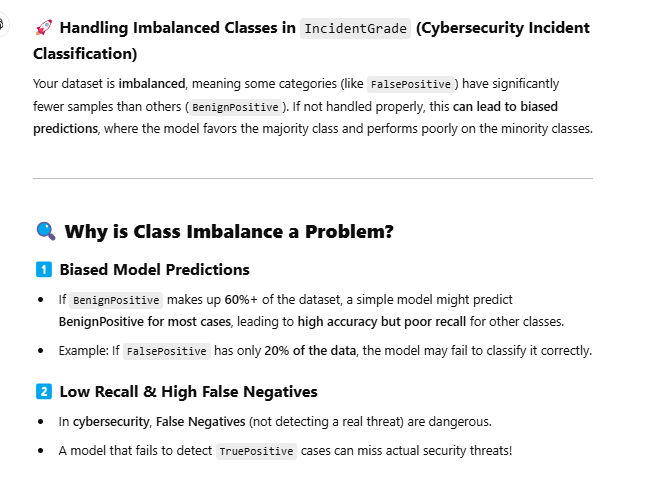

# Converting Timestamp to Numeric Features



In [21]:
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])
train_data['Year'] = train_data['Timestamp'].dt.year
train_data['Month'] = train_data['Timestamp'].dt.month
train_data['Day'] = train_data['Timestamp'].dt.day
train_data['Hour'] = train_data['Timestamp'].dt.hour

train_data.drop(columns='Timestamp',inplace=True)

In [22]:
train_data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

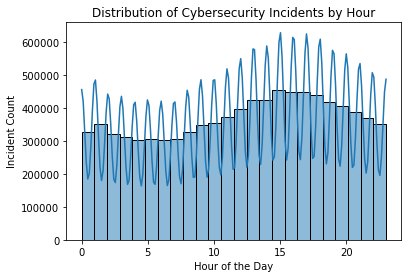

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_data['Hour'], bins=24, kde=True)
plt.title("Distribution of Cybersecurity Incidents by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Incident Count")
plt.show()


# 4. Exfiltration in "Categorical" Columns

Exploratory Data Analysis (EDA) - Visualizing Distributions

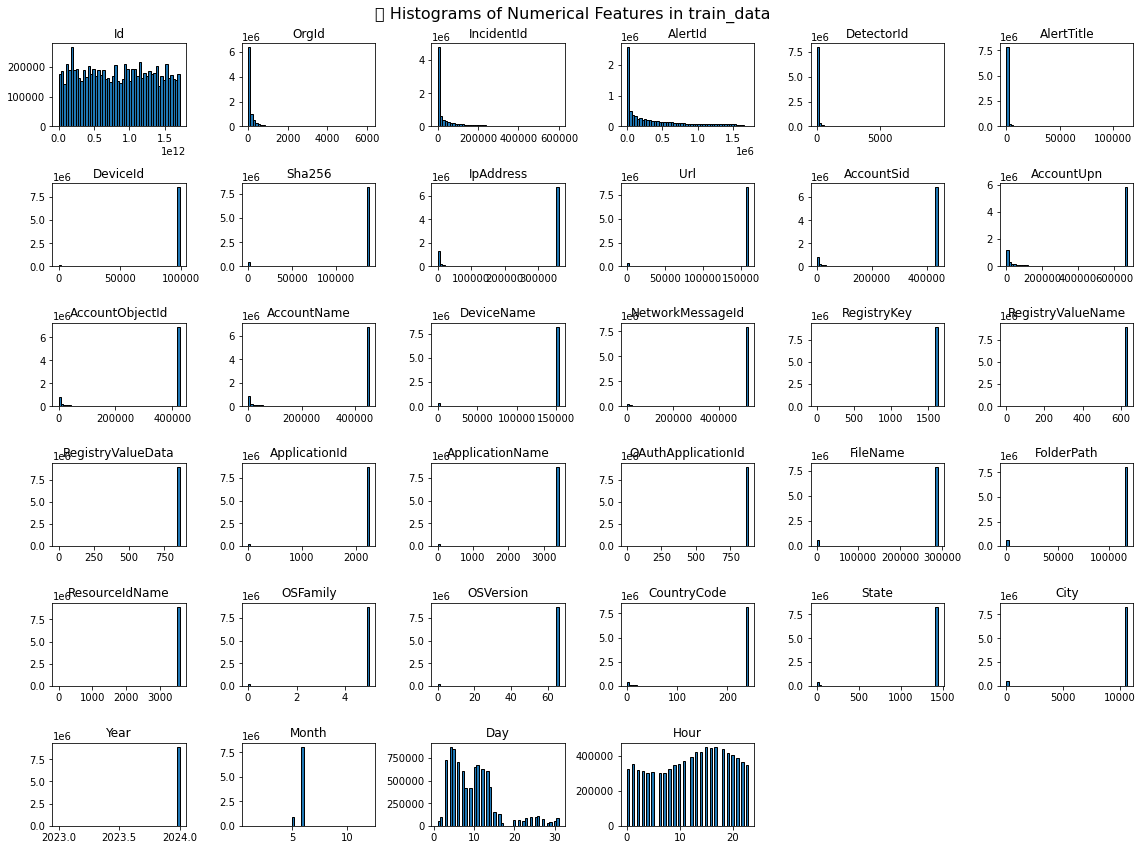

In [24]:
# 1️⃣ Histograms for Numerical Data


import matplotlib.pyplot as plt

# Create histograms with improved visibility
train_data.hist(figsize=(16, 12), bins=50, edgecolor='black', grid=False)

# Adjust layout for better spacing
plt.suptitle("🚀 Histograms of Numerical Features in train_data", fontsize=16)
plt.tight_layout()
plt.show()



##### Highly Skewed Features (Right-Skewed)

Features: IncidentId, AlertId, IpAddress, Url, DeviceId, Sha256, AccountSid, AccountName, etc.

In [25]:
import numpy as np

skewed_cols = ['IncidentId', 'AlertId', 'IpAddress', 'Url', 'DeviceId', 'Sha256']
for col in skewed_cols:
    train_data[col] = np.log1p(train_data[col])  # log1p avoids log(0) issue


##### ✅ Effect: The data becomes closer to normal distribution, helping the model generalize better.



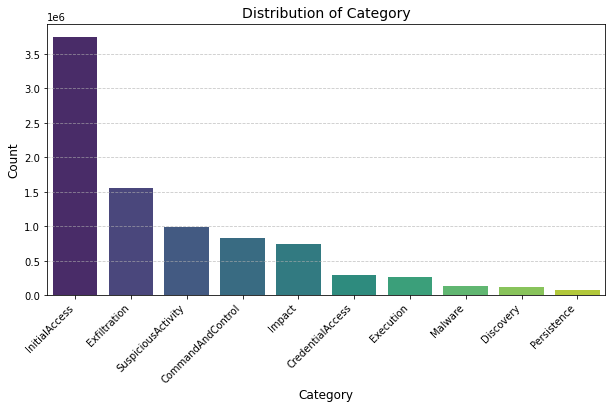

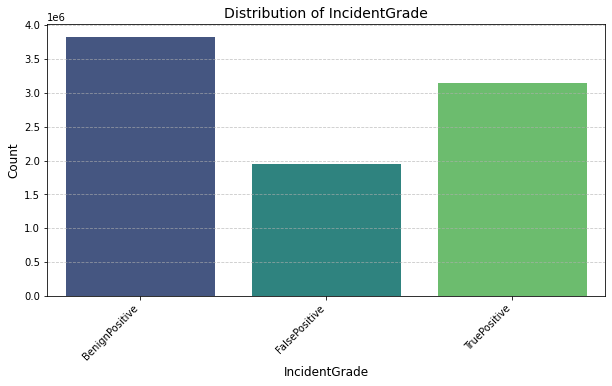

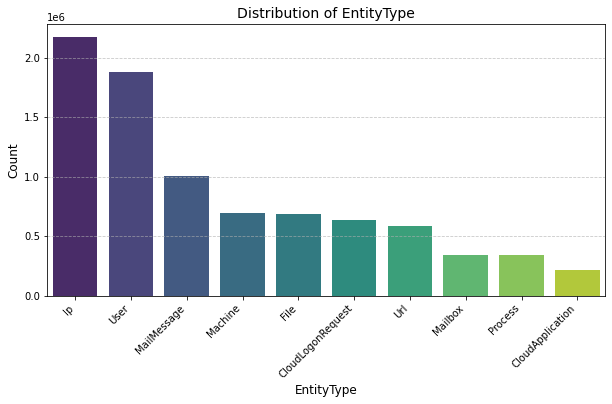

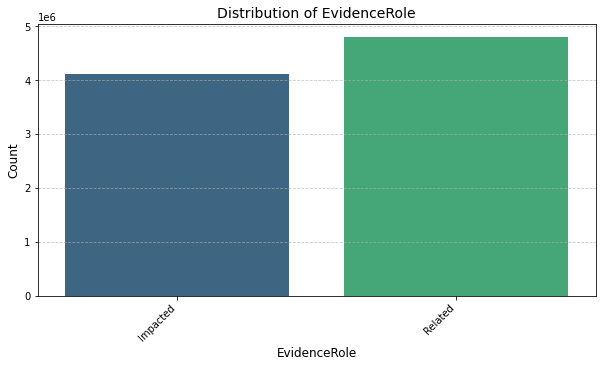

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_columns:
    plt.figure(figsize=(10, 5))  # Bigger figure size
    top_categories = train_data[col].value_counts().nlargest(10)  # Top 10 categories

    sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")  # Better color scheme
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for clarity
    plt.show()


# Visualizing the Data to Identify Outliers

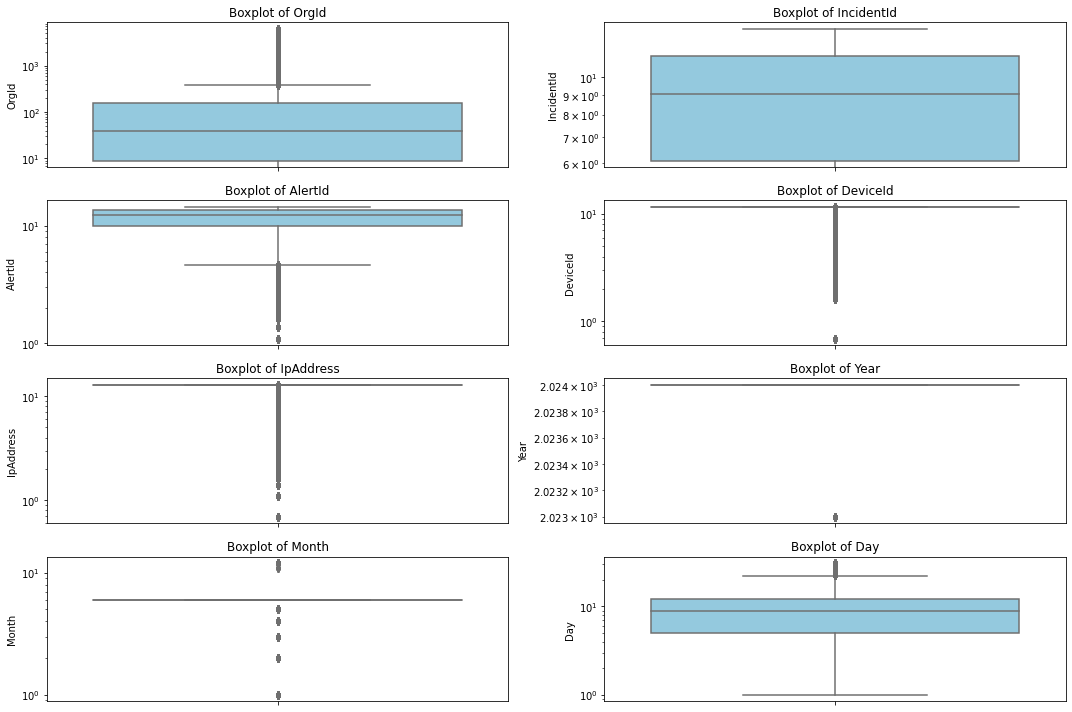

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = ['OrgId', 'IncidentId', 'AlertId', 'DeviceId', 'IpAddress', 'Year', 'Month', 'Day']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 1) // 2, 2, i)
    sns.boxplot(y=train_data[col], color="skyblue")
    plt.yscale("log")  # Apply log scale for better visualization
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Correlation Analysis

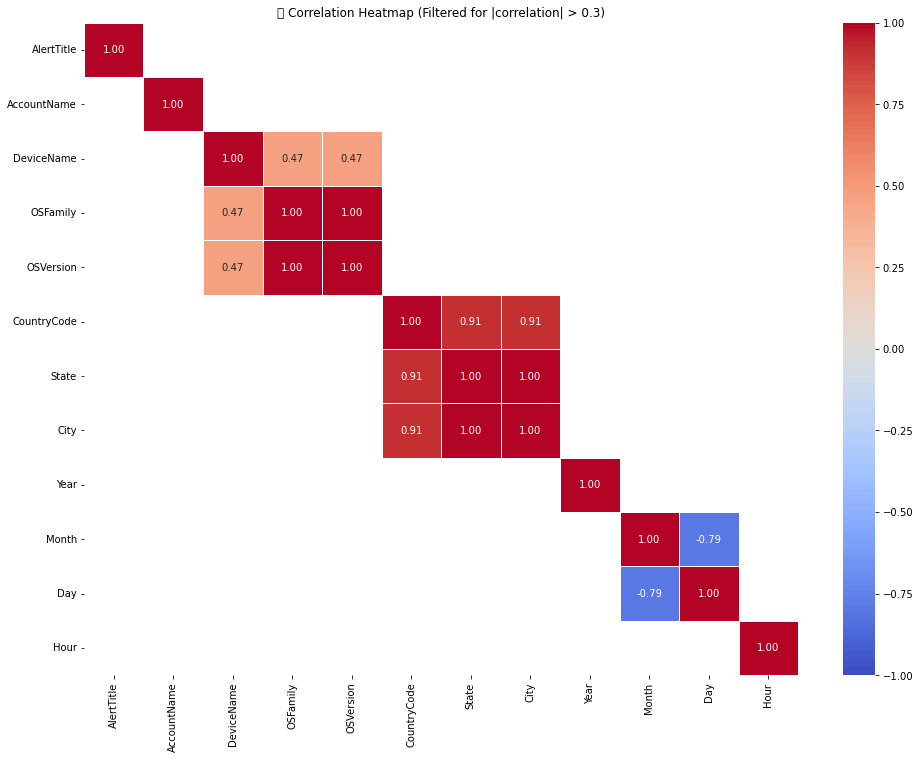

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define ID-based columns to remove from correlation analysis
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
              'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName']

# Copy dataset and remove ID-based columns
train_data1 = train_data.drop(columns=id_columns, errors='ignore')

# Compute correlation matrix
correlation_matrix = train_data1.corr()

# Set threshold for better readability (absolute correlation > 0.3)
filtered_correlation_matrix = correlation_matrix[(correlation_matrix > 0.3) | (correlation_matrix < -0.3)]

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('🔍 Correlation Heatmap (Filtered for |correlation| > 0.3)')
plt.show()


# Handling Outliers

In [31]:
def handle_outliers(df, iqr_multiplier=3.0):
    numeric_features = df.select_dtypes(include=['int8','int16', 'int32', 'int64', 'float64']).columns

    for col in numeric_features:
        # Quantile Capping (Before Removing Outliers)
        q_low = df[col].quantile(0.01)
        q_high = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=q_low, upper=q_high)  # Caps extreme values instead of removing them

        # IQR method to remove extreme outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Remove extreme outliers beyond IQR range
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


##### ✅ Step 1: Apply Outlier Handling

In [32]:
# Make a copy of the dataset for comparison
train_data_before = train_data.copy()

# Apply outlier handling
train_data_after = handle_outliers(train_data.copy(), iqr_multiplier=3.0)

# Check how many rows were removed
print(f"📉 Rows before outlier removal: {train_data_before.shape[0]}")
print(f"📉 Rows after outlier removal: {train_data_after.shape[0]}")
print(f"✅ Rows removed: {train_data_before.shape[0] - train_data_after.shape[0]}")


📉 Rows before outlier removal: 8922805
📉 Rows after outlier removal: 4395122
✅ Rows removed: 4527683


##### ✅ Step 2: Boxplots Before & After Outlier Removal

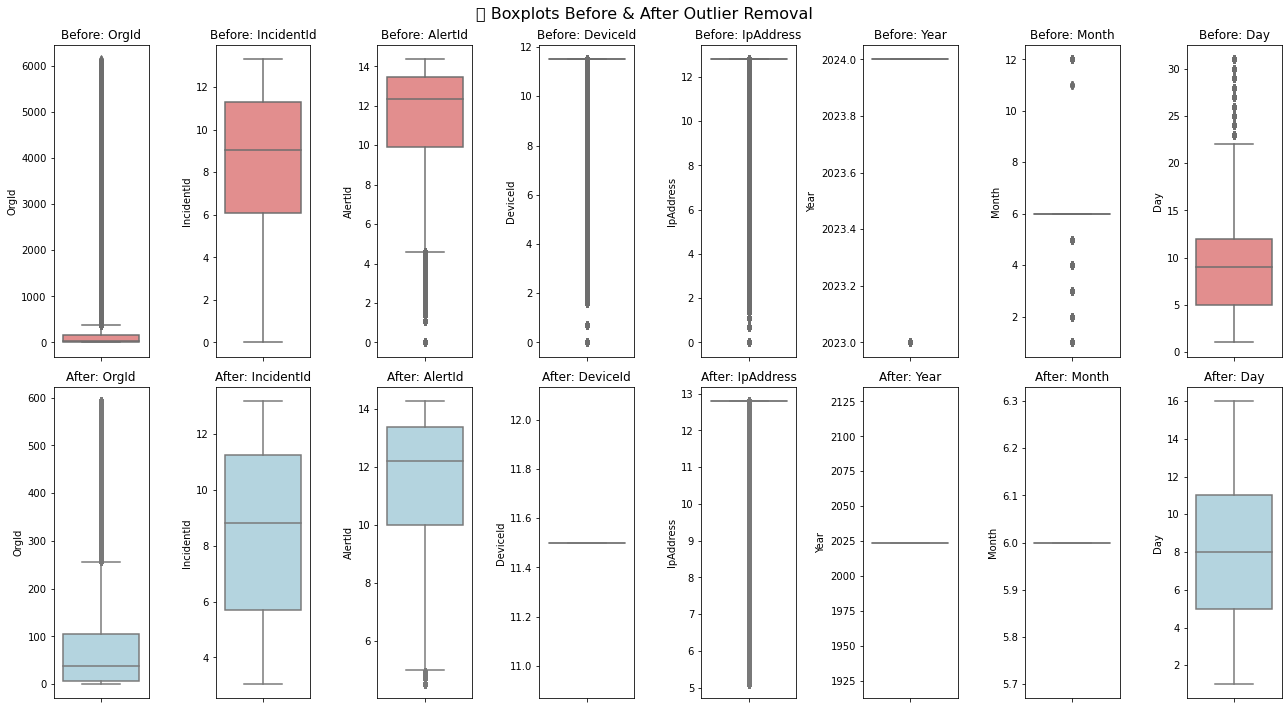

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features for visualization
numeric_features = ['OrgId', 'IncidentId', 'AlertId', 'DeviceId', 'IpAddress', 'Year', 'Month', 'Day']

# Set up figure
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_features), figsize=(18, 10))

for i, col in enumerate(numeric_features):
    # Before Outlier Removal
    sns.boxplot(y=train_data_before[col], color="lightcoral", ax=axes[0, i])
    axes[0, i].set_title(f'Before: {col}')

    # After Outlier Removal
    sns.boxplot(y=train_data_after[col], color="lightblue", ax=axes[1, i])
    axes[1, i].set_title(f'After: {col}')

fig.suptitle("📊 Boxplots Before & After Outlier Removal", fontsize=16)
plt.tight_layout()
plt.show()


##### ✅ Step 3: Histograms Before & After Outlier Removal

#### ✅ Key Benefits of Feature Selection (Option 2️⃣)

- Removes redundant or unimportant features, making the model more efficient.
- Reduces overfitting by eliminating noise from unnecessary features.
- Speeds up training time, especially for large datasets.


# Feature Importance via Random Forest

1️⃣ Train a basic RandomForestClassifier on a sample of the data.

2️⃣ Compute feature importance scores and visualize them.

3️⃣ Decide which features to drop based on their importance.

In [35]:
# ID columns that don't help in model training
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
              'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName']

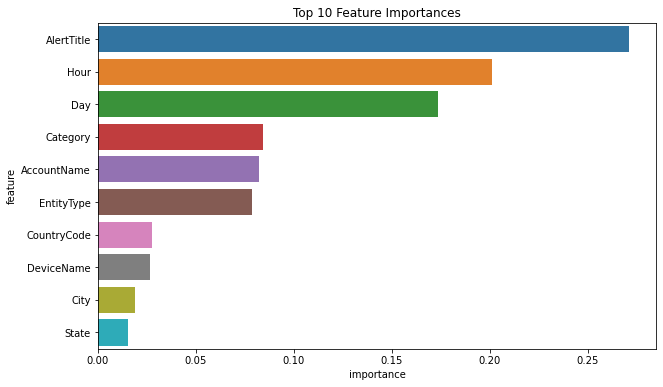

In [36]:
train_sample = train_data.sample(frac=0.001, random_state=42)
X = train_sample.drop(id_columns + ['IncidentGrade'], axis=1, errors='ignore')
y = train_sample['IncidentGrade']

non_numeric_cols = X.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [37]:
#total df imp
imp_features= [
    'Alert Title', 'Hour', 'Day', 'AccountName', 'Category', 'EntityType', 'DeviceName', 'CountryCode', 'State', 'City']

In [38]:
print(train_data.columns)
train_data.shape

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


(8922805, 38)

In [39]:
train_data.nunique()

Id                     707108
OrgId                    5340
IncidentId             448901
AlertId               1248789
DetectorId               7813
AlertTitle              79952
Category                   20
IncidentGrade               3
EntityType                 33
EvidenceRole                2
DeviceId                75557
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             353113
AccountUpn             524760
AccountObjectId        338252
AccountName            363254
DeviceName             114267
NetworkMessageId       375196
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
FileName               222085
FolderPath              87832
ResourceIdName           2283
OSFamily                    6
OSVersion                  58
CountryCode               236
State                    1368
City      

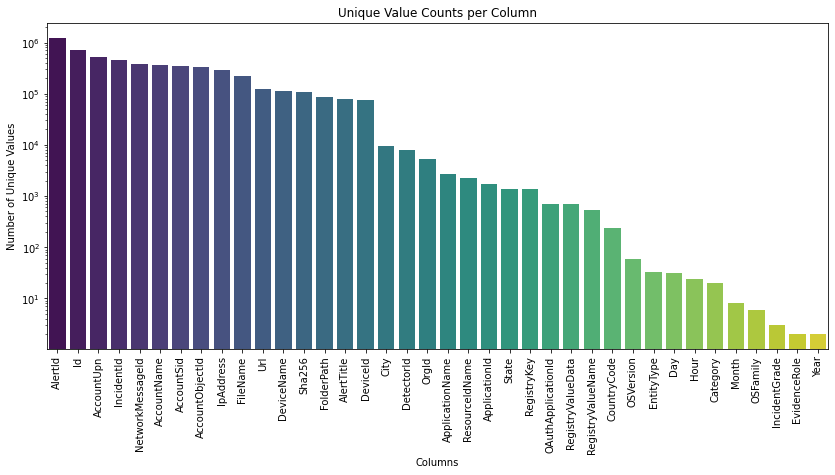

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute unique value counts per column
unique_counts = train_data.nunique().sort_values(ascending=False)

# Plot unique value counts
plt.figure(figsize=(14, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")

# Improve readability
plt.title('Unique Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.yscale('log')  # Use log scale for better visibility if high cardinality exists
plt.show()


In [42]:
train_data['AlertTitle'].value_counts()

0         1320112
2          596458
1          480010
3          411725
4          411413
           ...   
112093          1
112547          1
110022          1
102323          1
112743          1
Name: AlertTitle, Length: 79952, dtype: int64

In [43]:
train_data['Url'].value_counts()

11.985407    8333372
0.000000        8195
0.693147        6607
1.098612        5264
1.945910        4238
              ...   
11.914878          1
11.484392          1
11.299980          1
11.286903          1
11.635807          1
Name: Url, Length: 123252, dtype: int64

In [44]:
train_data['DeviceName'].value_counts().head(20)

153085    8228357
0            4376
1            3944
5            2153
4            2152
6            1879
13           1727
7            1631
10           1545
9            1519
8            1512
11           1284
12           1251
16           1187
15           1095
14           1094
22           1021
28            932
20            920
17            813
Name: DeviceName, dtype: int64

In [45]:
train_data['City'].value_counts()

10630    8295070
0         103145
1          22075
2          19195
3          15787
          ...   
5464           1
7403           1
6960           1
6598           1
10554          1
Name: City, Length: 9342, dtype: int64

In [46]:
train_data['OrgId'].value_counts()

0       844832
2       236415
1       210077
3       189731
5       173279
         ...  
5107         1
5902         1
5972         1
6080         1
5009         1
Name: OrgId, Length: 5340, dtype: int64

In [47]:
train_data['AccountSid'].value_counts().head(20)

441377    6855512
0           14469
1            8978
2            6017
3            5262
4            3770
5            3596
7            3144
8            2832
11           2552
6            2353
9            2340
12           2129
15           1993
14           1986
17           1930
18           1924
16           1878
19           1859
21           1847
Name: AccountSid, dtype: int64

In [48]:
train_data['AccountSid'].value_counts()

441377    6855512
0           14469
1            8978
2            6017
3            5262
           ...   
364377          1
354262          1
374107          1
414110          1
349553          1
Name: AccountSid, Length: 353113, dtype: int64

In [49]:
train_data['IncidentGrade'].value_counts()

BenignPositive    3827800
TruePositive      3140126
FalsePositive     1954879
Name: IncidentGrade, dtype: int64

In [50]:
# These features have minimal importance or are unlikely to impact your classification outcome
columns_to_drop = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DetectorId','Sha256', 'IpAddress', 
    'AccountSid', 'AccountUpn', 'AccountObjectId', 'DeviceId', 'NetworkMessageId',
    'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName',
    'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSVersion'
]
train_data.drop(columns=columns_to_drop, inplace=True)

In [51]:
print(train_data.columns)
train_data.shape

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'Url', 'AccountName', 'DeviceName', 'OSFamily', 'CountryCode', 'State',
       'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


(8922805, 16)

In [52]:
train_data.head()


,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Url,AccountName,DeviceName,OSFamily,CountryCode,State,City,Year,Month,Day,Hour
0,6,InitialAccess,TruePositive,Ip,Related,11.985407,453297,153085,5,31,6,3,2024,6,4,6
1,43,Exfiltration,FalsePositive,User,Impacted,11.985407,24887,153085,5,242,1445,10630,2024,6,14,3
2,298,InitialAccess,FalsePositive,Url,Related,11.136820,453297,153085,5,242,1445,10630,2024,6,13,4
3,2,CommandAndControl,BenignPositive,Url,Related,2.639057,453297,153085,5,242,1445,10630,2024,6,10,16
4,74,Execution,TruePositive,User,Impacted,11.985407,479,153085,5,242,1445,10630,2024,6,15,1


In [53]:
train_data.describe()


,AlertTitle,Url,AccountName,DeviceName,OSFamily,CountryCode,State,City,Year,Month,Day,Hour
count,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06
mean,2.939287e+03,1.165026e+01,3.589776e+05,1.426160e+05,4.893109e+00,2.226101e+02,1.346200e+03,9.897008e+03,2.024000e+03,5.904069e+00,9.824641e+00,1.214835e+01
std,1.120613e+04,1.478630e+00,1.732021e+05,3.708989e+04,7.216642e-01,6.443864e+01,3.600480e+02,2.673986e+03,4.478901e-03,2.981152e-01,6.276621e+00,6.767150e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.198541e+01,4.532970e+05,1.530850e+05,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,6.000000e+00,5.000000e+00,6.000000e+00
50%,1.400000e+01,1.198541e+01,4.532970e+05,1.530850e+05,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,6.000000e+00,9.000000e+00,1.300000e+01
75%,2.150000e+02,1.198541e+01,4.532970e+05,1.530850e+05,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,6.000000e+00,1.200000e+01,1.800000e+01
max,1.131740e+05,1.198541e+01,4.532970e+05,1.530850e+05,5.000000e+00,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03,1.200000e+01,3.100000e+01,2.300000e+01


In [54]:
train_data.dtypes

AlertTitle          int32
Category           object
IncidentGrade    category
EntityType         object
EvidenceRole     category
Url               float64
AccountName         int32
DeviceName          int32
OSFamily             int8
CountryCode         int16
State               int16
City                int16
Year                int64
Month               int64
Day                 int64
Hour                int64
dtype: object

##  Feature Encoding for Categorical Variables in Cybersecurity Incident Classification

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 📌 Step 1: Convert All Categorical Columns to String Before Encoding
def convert_categorical_to_string(df, categorical_cols):
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype(str)  # Convert to string to avoid mixed types
    return df

# 📌 Step 2: Define Categorical Columns
categorical_columns = ['AlertTitle', 'Category', 'EntityType', 'EvidenceRole',
                       'Url', 'AccountName', 'DeviceName', 'OSFamily', 
                       'CountryCode', 'State', 'City', 'Year', 'Month', 'Day', 'Hour']

# Convert categorical columns to string format
train_data = convert_categorical_to_string(train_data, categorical_columns)

# 📌 Step 3: Group Less Frequent Categories into "Others"
columns_to_group = ['AlertTitle', 'Url', 'AccountName', 'DeviceName', 'CountryCode', 'State', 'City']
for column in columns_to_group:
    if column in train_data.columns:
        category_counts = train_data[column].value_counts()
        top_categories = category_counts.nlargest(5).index  # Keep only top 5 categories
        train_data[column] = train_data[column].where(train_data[column].isin(top_categories), 'Others')

# Fill missing values if any
train_data[columns_to_group] = train_data[columns_to_group].fillna('Others')

# 📌 Step 4: Label Encode Ordinal Categorical Variables
encoding_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']
label_encoder = LabelEncoder()
for col in encoding_columns:
    if col in train_data.columns:
        train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))  # Convert to string before encoding

# 📌 Step 5: Convert Grouped Categorical Features into Label Encoding
for col in columns_to_group:
    if col in train_data.columns:
        train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))  # Convert to string before encoding

# 📌 Step 6: Apply One-Hot Encoding to Remaining Categorical Features
one_hot_columns = [col for col in categorical_columns if col in train_data.columns and col not in encoding_columns and col not in columns_to_group]
train_data = pd.get_dummies(train_data, columns=one_hot_columns, drop_first=True)

# 📌 Step 7: Verify Transformed Data
print("✅ Transformed DataFrame shape:", train_data.shape)
print("✅ Sample of Transformed Data:")
print(train_data.head())


✅ Transformed DataFrame shape: (6579292, 48)
✅ Sample of Transformed Data:
   AlertTitle  Category  IncidentGrade  EntityType  EvidenceRole  Url  \
1           4        17              1          26             0    0   
4           4        16              2          26             0    0   
7           4        17              0          14             0    0   
8           3         8              0          20             1    0   
9           4         2              2          26             0    0   

   AccountName  DeviceName  CountryCode  State  ...  Hour_21  Hour_22  \
1            4           0            0      0  ...        0        0   
4            4           0            0      0  ...        0        0   
7            3           0            0      0  ...        0        0   
8            3           0            0      0  ...        0        0   
9            4           0            0      0  ...        0        0   

   Hour_23  Hour_3  Hour_4  Hour_5  Hour_6  Hou

In [57]:
train_data.shape

(6579292, 48)

## Scaling/Normalization

#### StandardScaler

Using StandardScaler because:
    
StandardScaler standardizes features to have zero mean and unit variance, which is beneficial for algorithms that assume normality or are sensitive to feature scaling.


It is less sensitive to outliers compared to MinMaxScaler, which compresses data based on min and max values.


Handles Non-Uniform Distributions

### Encoding Categorical Variables


###### 1.Label Encoding for Ordinal Variables
###### 2.One-hot encoding for nominal columns

In [59]:
train_data.shape


(6579292, 48)

In [60]:
# Display the first few rows of each dataset
print("Training Data:")
print(train_data.head())


Training Data:
   AlertTitle  Category  IncidentGrade  EntityType  EvidenceRole  Url  \
1           4        17              1          26             0    0   
4           4        16              2          26             0    0   
7           4        17              0          14             0    0   
8           3         8              0          20             1    0   
9           4         2              2          26             0    0   

   AccountName  DeviceName  CountryCode  State  ...  Hour_21  Hour_22  \
1            4           0            0      0  ...        0        0   
4            4           0            0      0  ...        0        0   
7            3           0            0      0  ...        0        0   
8            3           0            0      0  ...        0        0   
9            4           0            0      0  ...        0        0   

   Hour_23  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  
1        0       1       0       0    

#### 🚀 Next Step: Apply SMOTE Oversampling


Since class imbalance exists (Imbalance Ratio: 4.38), we will use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by increasing samples in the minority class (FalsePositive).

### Saving the Cleaned Train Data set as Joblib for further processing

In [62]:
train_data = train_data.reset_index(drop=True)

In [63]:
# Saveing the data using Joblib
joblib.dump(train_data, 'encoded_train_data.joblib')

['encoded_train_data.joblib']

In [64]:
# Loading the data using Joblib
train_data = joblib.load('encoded_train_data.joblib')

In [65]:
train_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Url,AccountName,DeviceName,CountryCode,State,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,4,17,1,26,0,0,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,16,2,26,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,17,0,14,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,20,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,2,26,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
train_data.shape

(6579292, 48)

In [67]:
print(train_data.memory_usage(deep=True).sum() / (1024 ** 2), "MB")

533.3327751159668 MB


In [125]:
train_data.to_csv("final_train1_data.csv", index=False)
train_data=pd.read_csv("final_train1_data.csv")

In [126]:
# Reload the dataset to verify successful saving
train_data = pd.read_csv("final_train1_data.csv")


In [124]:
## Load saved train_data

import pandas as pd
file_path = "final_train_data.csv"  # Ensure the file is in the same directory as your notebook
train_data = pd.read_csv(file_path)
print("✅ Dataset Loaded Successfully!")
print(train_data.shape)  # Show number of rows & columns
print(train_data)  # Show first 5 rows


✅ Dataset Loaded Successfully!
(6579292, 48)
         AlertTitle  Category  IncidentGrade  EntityType  EvidenceRole  Url  \
0                 4        17              1          26             0    0   
1                 4        16              2          26             0    0   
2                 4        17              0          14             0    0   
3                 3         8              0          20             1    0   
4                 4         2              2          26             0    0   
...             ...       ...            ...         ...           ...  ...   
6579287           4        16              1          28             0    0   
6579288           0         2              2          26             0    0   
6579289           4         2              2          29             1    0   
6579290           4        17              0          14             0    0   
6579291           4        17              0          14             0    0   

      

# Test Data

In [63]:
import zipfile
import pandas as pd

# Define the path to the ZIP file containing the test dataset
test_zip_path = r"D:\Microsofr_Class\Dataset\GUIDE_Test.csv.zip"

# Define the extraction directory
extract_dir = r"D:\Microsofr_Class"

# Extract the test ZIP file
with zipfile.ZipFile(test_zip_path, 'r') as test_zip:
    test_zip.extractall(extract_dir)
    print(f"Extracted: {test_zip.namelist()}")

# Path to the extracted CSV file
test_csv_path = r"D:\Microsofr_Class\GUIDE_Test.csv"

# Read the test CSV file into a pandas DataFrame
test_data = pd.read_csv(test_csv_path)

# Display the first few rows of the test dataset
print("\nTesting Data:")
print(test_data.head())


Extracted: ['GUIDE_Test.csv']


C:\Users\SHAMEEM\AppData\Local\Temp\ipykernel_6996\1070978486.py:19: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_csv_path)



Testing Data:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade  ...       Roles OSFamily OSVersion

In [64]:
import pandas as pd

# Function to optimize memory usage
def optimize_memory(df):
    # Downcast numerical columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')

    # Convert object columns to category type
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')

    return df

# Path to the test dataset
test_dataset = r"D:\Microsofr_Class\GUIDE_Test.csv"  # Update with the correct path

# Initialize list to store chunks
chunks = []

# Read the test dataset in chunks and process each chunk
for chunk in pd.read_csv(test_dataset, chunksize=500000, low_memory=False):
    chunk = optimize_memory(chunk)  # Optimize memory usage for each chunk
    chunks.append(chunk)  # Append processed chunk to the list

# Concatenate all chunks into a single DataFrame
test_data = pd.concat(chunks, ignore_index=True)

# Clean up memory
del chunks

# Display memory usage after optimization
print("Memory usage after optimization:")
print(test_data.info(memory_usage='deep'))

# Preview the first few rows of the optimized DataFrame
print("First few rows of the optimized DataFrame:")
print(test_data.head())


Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  int64   
 1   OrgId               int16   
 2   IncidentId          int32   
 3   AlertId             int32   
 4   Timestamp           object  
 5   DetectorId          int16   
 6   AlertTitle          int32   
 7   Category            object  
 8   MitreTechniques     object  
 9   IncidentGrade       category
 10  ActionGrouped       category
 11  ActionGranular      object  
 12  EntityType          object  
 13  EvidenceRole        category
 14  DeviceId            int32   
 15  Sha256              int32   
 16  IpAddress           int32   
 17  Url                 int32   
 18  AccountSid          int32   
 19  AccountUpn          int32   
 20  AccountObjectId     int32   
 21  AccountName         int32   
 22  DeviceName          int32   
 23 

In [65]:
test_data.head()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [66]:
print(test_data.shape)


(4147992, 46)


In [67]:
test_data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  int64   
 1   OrgId               int16   
 2   IncidentId          int32   
 3   AlertId             int32   
 4   Timestamp           object  
 5   DetectorId          int16   
 6   AlertTitle          int32   
 7   Category            object  
 8   MitreTechniques     object  
 9   IncidentGrade       category
 10  ActionGrouped       category
 11  ActionGranular      object  
 12  EntityType          object  
 13  EvidenceRole        category
 14  DeviceId            int32   
 15  Sha256              int32   
 16  IpAddress           int32   
 17  Url                 int32   
 18  AccountSid          int32   
 19  AccountUpn          int32   
 20  AccountObjectId     int32   
 21  AccountName         int32   
 22  DeviceName          int32   
 23  NetworkMessageId    int32   
 24

In [69]:
test_data.describe()


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,...,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06
mean,8.462250e+11,1.756698e+02,6.780345e+04,4.072191e+05,1.008391e+02,2.529514e+03,9.575061e+04,1.283939e+05,2.873898e+05,1.504279e+05,...,3.342993e+03,8.808119e+02,2.618998e+05,1.074020e+05,3.583541e+03,4.899529e+00,6.466873e+01,2.222218e+02,1.344570e+03,9.883839e+03
std,4.923351e+11,3.708729e+02,1.178736e+05,4.550578e+05,4.082934e+02,1.044138e+04,1.615628e+04,3.457595e+04,1.400920e+05,3.734754e+04,...,5.096996e+02,1.238317e+01,8.208434e+04,3.260346e+04,9.012124e+01,7.001299e-01,9.269678e+00,6.499822e+01,3.626851e+02,2.696302e+03
min,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.209068e+11,8.000000e+00,4.110000e+02,2.365900e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.300000e+01,8.818000e+03,2.228970e+05,7.000000e+00,9.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.730000e+02,7.944000e+04,6.711010e+05,3.900000e+01,1.160000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.138000e+03,5.997000e+05,1.721457e+06,9.520000e+03,1.131690e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


## Handling Missing Data

#### 1️⃣ Check Missing Values

In [70]:
test_data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

#### 2️⃣ Drop Columns with More Than 50% Missing Values

In [71]:
# Dropping Columns with More Than 50% Missing Values in test_data
missing_percentage_test = test_data.isnull().mean() * 100
columns_to_drop_test = missing_percentage_test[missing_percentage_test > 50].index

# Drop the identified columns
test_data.drop(columns=columns_to_drop_test, axis=1, inplace=True)

# Display dropped columns
print(f"✅ Columns dropped in test_data due to >50% missing values: {columns_to_drop_test.tolist()}")

# Verify test_data shape after dropping
print(f"📝 Updated test_data shape: {test_data.shape}")


✅ Columns dropped in test_data due to >50% missing values: ['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']
📝 Updated test_data shape: (4147992, 36)


IncidentGrade', Since this is our target column, we cannot have missing values here.

The best option is to drop rows where the IncidentGrade is missing, as imputing the target variable might lead to misleading results.

#### 3️⃣ Drop Rows Where IncidentGrade is Missing

In [72]:
# Dropping rows where 'IncidentGrade' is missing (if applicable in test_data)
if 'IncidentGrade' in test_data.columns:
    test_data = test_data.dropna(subset=['IncidentGrade'])
    print("Dropped rows with missing 'IncidentGrade' in test_data.")

# Confirm the updated test_data shape
print("Updated test_data shape:", test_data.shape)

Dropped rows with missing 'IncidentGrade' in test_data.
Updated test_data shape: (4147992, 36)


In [73]:
# Droping rows where 'IncidentGrade' is missing
train_data = train_data.dropna(subset=['IncidentGrade'])

#### 4️⃣ Check & Drop Duplicate Rows

In [74]:
test_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [75]:
test_data.duplicated().sum()

225297

In [76]:
# Droping duplicate rows from the dataset
test_data = test_data.drop_duplicates()

print(f"Number of rows after removing duplicates: {test_data.shape[0]}")

Number of rows after removing duplicates: 3922695


### 5️⃣ Check Target Variable (IncidentGrade) Distribution

In [77]:
# Target variable distribution
print("Target variable distribution:")
test_data['IncidentGrade'].value_counts()

Target variable distribution:


BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: IncidentGrade, dtype: int64

#### 6️⃣ Visualize Target Variable Distribution

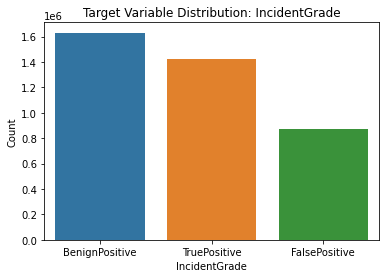

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.countplot(data=test_data, x='IncidentGrade', order=test_data['IncidentGrade'].value_counts().index)
plt.title('Target Variable Distribution: IncidentGrade')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

In [79]:
print(f"Number of rows after removing duplicates: {test_data.shape[0]}")


Number of rows after removing duplicates: 3922695


#### Converting Timestamp to Numeric Features

In [80]:
# Converting 'Timestamp' column to datetime format in test_data
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])

# Extracting Year, Month, Day, and Hour from Timestamp
test_data['Year'] = test_data['Timestamp'].dt.year
test_data['Month'] = test_data['Timestamp'].dt.month
test_data['Day'] = test_data['Timestamp'].dt.day
test_data['Hour'] = test_data['Timestamp'].dt.hour

# Dropping the original 'Timestamp' column
test_data.drop(columns='Timestamp', inplace=True)

# Confirming the changes
print("Updated test_data shape:", test_data.shape)
print("Columns after processing timestamp:", test_data.columns)


Updated test_data shape: (3922695, 39)
Columns after processing timestamp: Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


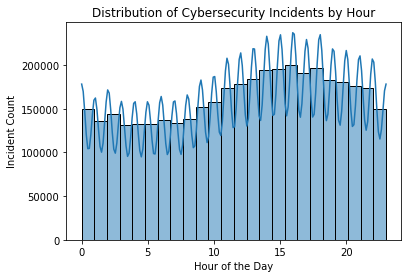

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(test_data['Hour'], bins=24, kde=True)
plt.title("Distribution of Cybersecurity Incidents by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Incident Count")
plt.show()

## 4. Exfiltration in "Categorical" Columns
#### Exploratory Data Analysis (EDA) - Visualizing Distributions

C:\Users\SHAMEEM\AppData\Local\Temp\ipykernel_6996\1123924620.py:11: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


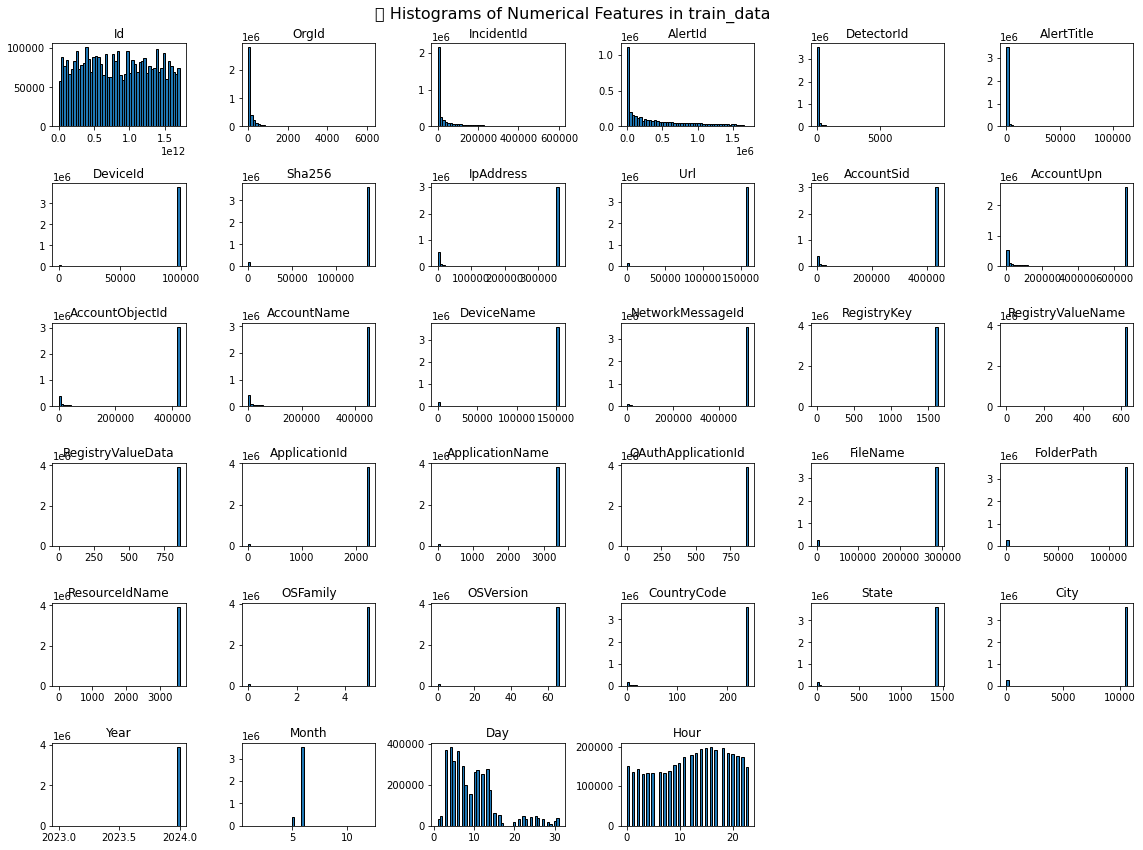

In [82]:
# 1️⃣ Histograms for Numerical Data


import matplotlib.pyplot as plt

# Create histograms with improved visibility
test_data.hist(figsize=(16, 12), bins=50, edgecolor='black', grid=False)

# Adjust layout for better spacing
plt.suptitle("🚀 Histograms of Numerical Features in train_data", fontsize=16)
plt.tight_layout()
plt.show()



In [83]:
import numpy as np

# Identify skewed numerical columns from test_data
skewed_cols = ['IncidentId', 'AlertId', 'IpAddress', 'Url', 'DeviceId', 'Sha256']

# Apply log1p transformation only if the column exists in test_data
for col in skewed_cols:
    if col in test_data.columns:
        test_data[col] = np.log1p(test_data[col])  # log1p avoids log(0) issue
    else:
        print(f"⚠️ Column '{col}' not found in test_data, skipping transformation.")


##### ✅ Effect: The data becomes closer to normal distribution, helping the model generalize better.

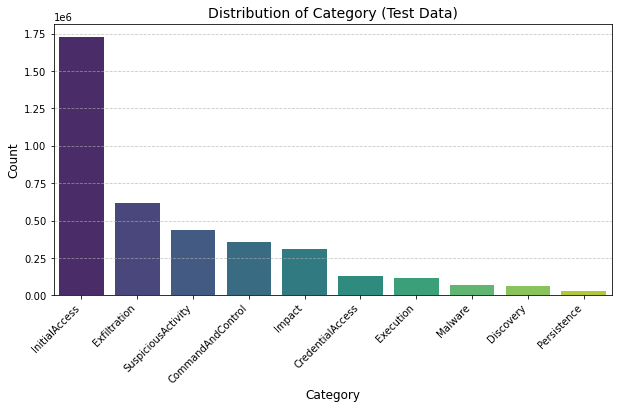

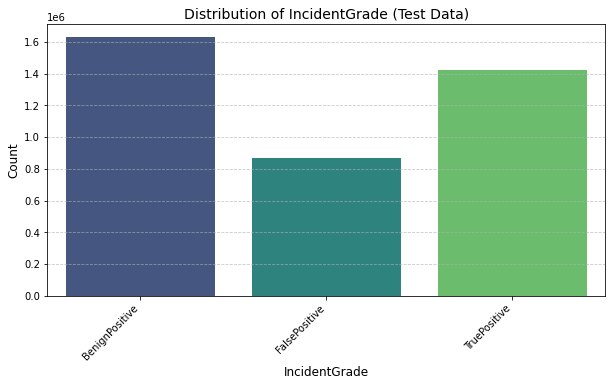

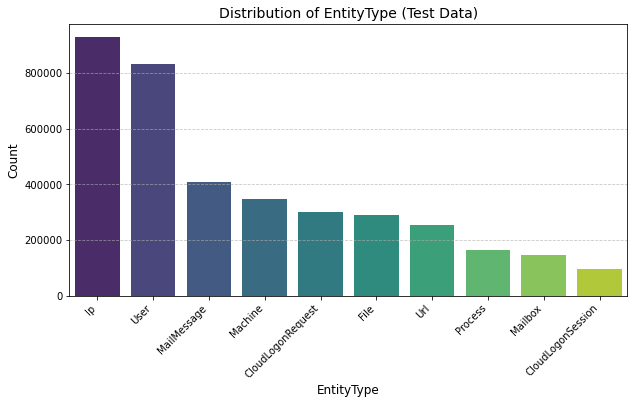

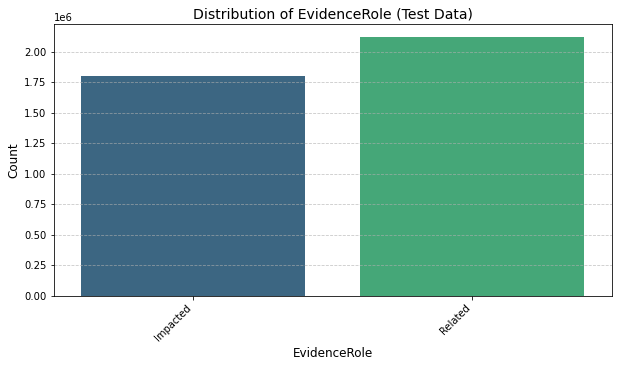

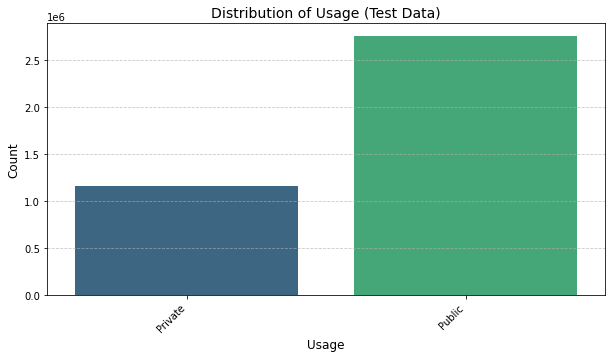

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns in test_data
categorical_columns = test_data.select_dtypes(include=['object' , 'category']).columns.tolist()

for col in categorical_columns:
    if col in test_data.columns:  # Ensure the column exists
        plt.figure(figsize=(10, 5))  # Bigger figure size
        top_categories = test_data[col].value_counts().nlargest(10)  # Top 10 categories

        sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")  # Better color scheme
        plt.title(f"Distribution of {col} (Test Data)", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for clarity
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in test_data, skipping plot.")


### Visualizing the Data to Identify Outliers

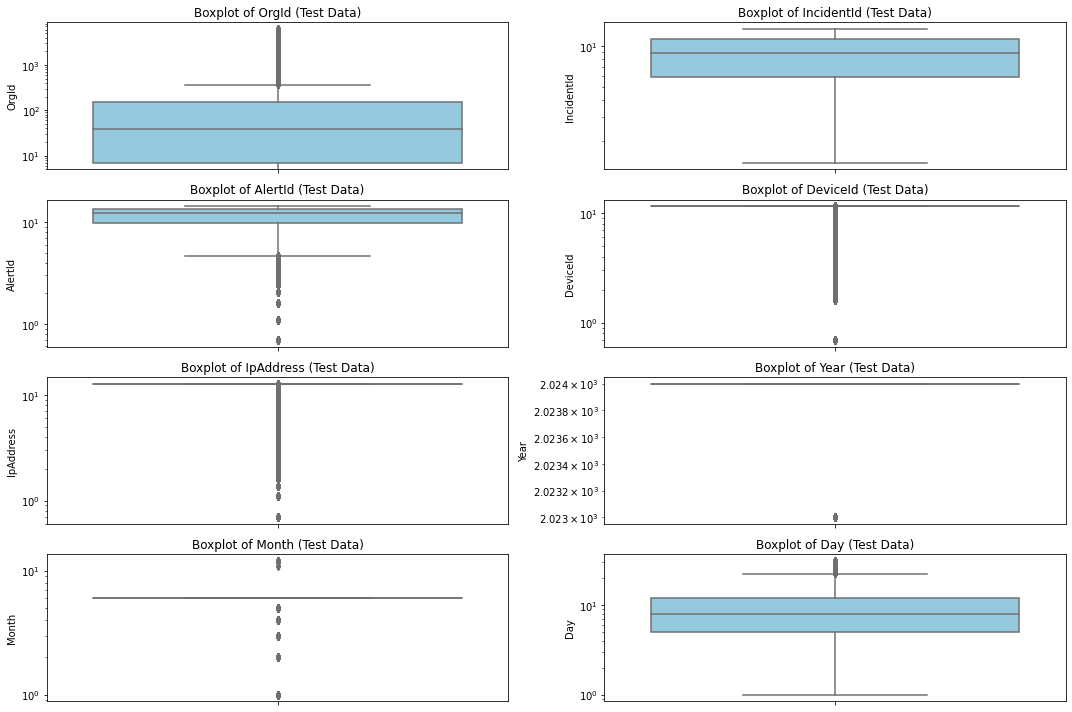

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of numerical columns in test_data
numeric_cols = ['OrgId', 'IncidentId', 'AlertId', 'DeviceId', 'IpAddress', 'Year', 'Month', 'Day']

# Ensure columns exist in test_data before plotting
valid_numeric_cols = [col for col in numeric_cols if col in test_data.columns]

if valid_numeric_cols:
    plt.figure(figsize=(15, 10))  # Set figure size

    for i, col in enumerate(valid_numeric_cols, 1):
        plt.subplot((len(valid_numeric_cols) + 1) // 2, 2, i)  # Adjust subplot layout
        sns.boxplot(y=test_data[col], color="skyblue")
        plt.yscale("log")  # Apply log scale for better visualization
        plt.title(f'Boxplot of {col} (Test Data)')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid numeric columns found in test_data for visualization.")


#### Correlation Analysis

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


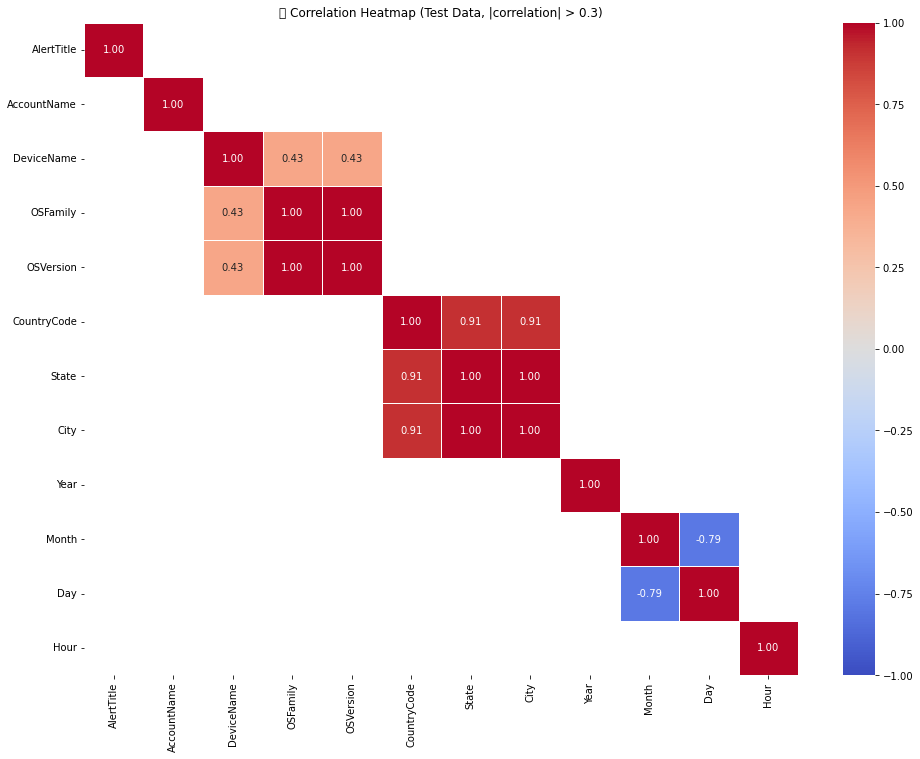

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define ID-based columns to remove from correlation analysis
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
              'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName']

# Copy dataset and remove ID-based columns (only if they exist in test_data)
test_data1 = test_data.drop(columns=[col for col in id_columns if col in test_data.columns], errors='ignore')

# Compute correlation matrix
correlation_matrix = test_data1.corr()

# Set threshold for better readability (absolute correlation > 0.3)
filtered_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > 0.3)]

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('🔍 Correlation Heatmap (Test Data, |correlation| > 0.3)')
plt.show()


## Handling Outliers

In [87]:
def handle_outliers(df, iqr_multiplier=3.0):
    numeric_features = df.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float64']).columns

    for col in numeric_features:
        # Quantile Capping (Before Removing Outliers)
        q_low = df[col].quantile(0.01)
        q_high = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=q_low, upper=q_high)  # Caps extreme values instead of removing them

        # IQR method to calculate bounds (but not remove for test data!)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Optional: Log the number of outliers for reference
        print(f"Feature '{col}': {((df[col] < lower_bound) | (df[col] > upper_bound)).sum()} potential outliers")

    return df


#### ✅ Step 1: Apply Outlier Handling

In [88]:
# Make a copy of the dataset for comparison
test_data_before = test_data.copy()

# Apply outlier handling (Only capping, no row removal for test data)
test_data_after = handle_outliers(test_data.copy(), iqr_multiplier=3.0)

# Log changes (only capping, so no row removal should occur)
print(f"📉 Rows before outlier handling: {test_data_before.shape[0]}")
print(f"📉 Rows after outlier handling: {test_data_after.shape[0]}")
print(f"✅ Rows modified (capping applied, no rows dropped): {test_data_before.shape[0] - test_data_after.shape[0]}")


Feature 'Id': 0 potential outliers
Feature 'OrgId': 286953 potential outliers
Feature 'IncidentId': 0 potential outliers
Feature 'AlertId': 0 potential outliers
Feature 'DetectorId': 442227 potential outliers
Feature 'DeviceId': 152964 potential outliers
Feature 'Sha256': 326151 potential outliers
Feature 'IpAddress': 928270 potential outliers
Feature 'Url': 254425 potential outliers
Feature 'RegistryKey': 0 potential outliers
Feature 'RegistryValueName': 0 potential outliers
Feature 'RegistryValueData': 0 potential outliers
Feature 'ApplicationId': 92703 potential outliers
Feature 'ApplicationName': 95309 potential outliers
Feature 'OAuthApplicationId': 0 potential outliers
Feature 'ResourceIdName': 0 potential outliers
Feature 'OSFamily': 83844 potential outliers
Feature 'OSVersion': 83839 potential outliers
Feature 'CountryCode': 352952 potential outliers
Feature 'State': 296460 potential outliers
Feature 'City': 296910 potential outliers
Feature 'Year': 0 potential outliers
Feature

#### ✅ Step 2: Boxplots Before & After Outlier Removal

C:\Users\SHAMEEM\AppData\Local\Temp\ipykernel_6996\2581773107.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


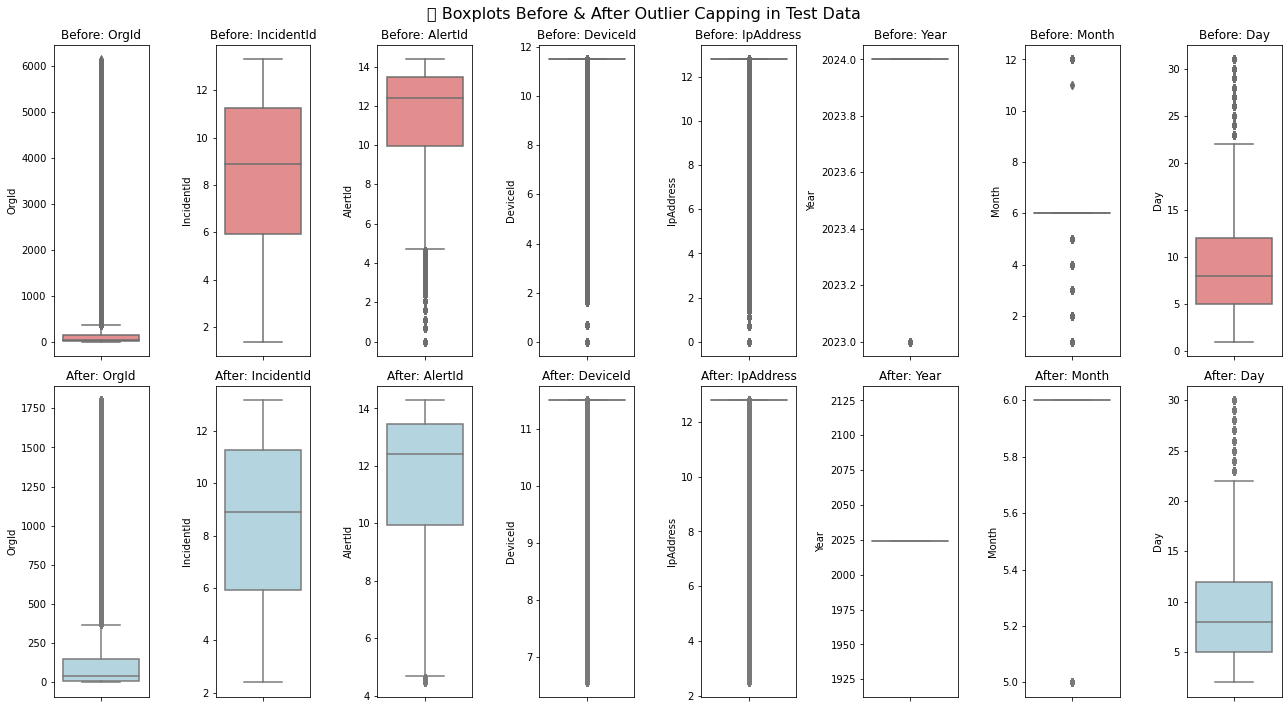

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features for visualization
numeric_features = ['OrgId', 'IncidentId', 'AlertId', 'DeviceId', 'IpAddress', 'Year', 'Month', 'Day']

# Set up figure
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_features), figsize=(18, 10))

for i, col in enumerate(numeric_features):
    # Before Outlier Capping
    sns.boxplot(y=test_data_before[col], color="lightcoral", ax=axes[0, i])
    axes[0, i].set_title(f'Before: {col}')

    # After Outlier Capping
    sns.boxplot(y=test_data_after[col], color="lightblue", ax=axes[1, i])
    axes[1, i].set_title(f'After: {col}')

fig.suptitle("📊 Boxplots Before & After Outlier Capping in Test Data", fontsize=16)
plt.tight_layout()
plt.show()


Now that outliers have been handled, the next logical step is Feature Importance Analysis to identify which features actually contribute to model performance.

## Feature Importance via Random Forest

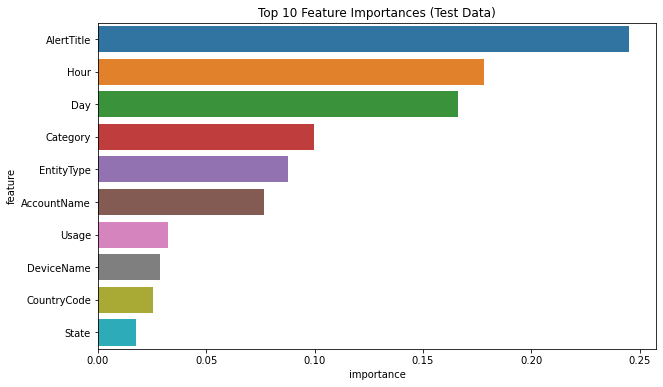

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# ✅ Ensure Test Data Matches Train Data (Fix Missing Columns)
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Assign default value for missing columns

# ✅ ID Columns & Unwanted Time Columns to Remove
columns_to_remove = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256',
    'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
    'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
    'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
    'FileName', 'FolderPath', 'ResourceIdName',
    # Remove Unwanted Time Columns (Day_* and Hour_*)
    'Hour_9', 'Hour_10', 'Hour_5', 'Day_4.0', 'Hour_2', 'Hour_4', 'Hour_7', 'Hour_15',
    'Day_3.0', 'Hour_11', 'Day_15.0', 'Hour_12', 'Hour_1', 'Day_6.0',
    'Day_2.0', 'Day_16.0', 'Day_8.0', 'Hour_14', 'Hour_21', 'Day_5.0',
    'Day_9.0', 'Day_11.0', 'Hour_17', 'Day_7.0', 'Hour_16', 'Hour_22',
    'Day_12.0', 'Hour_8', 'Hour_3', 'Day_13.0', 'Day_14.0', 'Hour_13',
    'Hour_18', 'Hour_19', 'Hour_23', 'Hour_20', 'Hour_6'
]

# ✅ Drop Unwanted Columns from Test Data
test_data = test_data.drop(columns=columns_to_remove, errors='ignore')

# ✅ Sample Test Data for Efficient Processing
test_sample = test_data.sample(frac=0.001, random_state=42)

# ✅ Feature Selection: Drop ID-Based Columns
X_test = test_sample.drop(columns=['IncidentGrade'], axis=1, errors='ignore')

# ✅ Ensure 'IncidentGrade' Exists in Test Data (May Not Be Present)
y_test = test_sample['IncidentGrade'] if 'IncidentGrade' in test_sample.columns else None

# ✅ Encode Categorical Columns
non_numeric_cols = X_test.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X_test[col] = le.fit_transform(X_test[col].astype(str))

# ✅ Train Random Forest Model (If 'IncidentGrade' Exists)
if y_test is not None:
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_test, y_test)

    # ✅ Compute Feature Importances
    feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': rf.feature_importances_})
    feature_importances = feature_importances.sort_values('importance', ascending=False)

    # ✅ Plot Feature Importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
    plt.title('Top 10 Feature Importances (Test Data)')
    plt.show()
else:
    print("⚠️ 'IncidentGrade' not found in test_data. Skipping model training.")


In [91]:
imp_features = [
    'AlertTitle',
    'Category',
    'EntityType',
    'AccountName',
    'DeviceName',
    'CountryCode',
    'State',
    'City',
    'EvidenceRole',
    'IncidentGrade'
]


In [92]:
print(test_data.columns)
test_data.shape

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'AccountName', 'DeviceName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


(3922695, 17)

In [93]:
test_data.nunique()

AlertTitle        42265
Category             19
IncidentGrade         3
EntityType           29
EvidenceRole          2
AccountName      222314
DeviceName        74791
OSFamily              5
OSVersion            43
CountryCode         212
State              1159
City               6637
Usage                 2
Year                  2
Month                 8
Day                  31
Hour                 24
dtype: int64

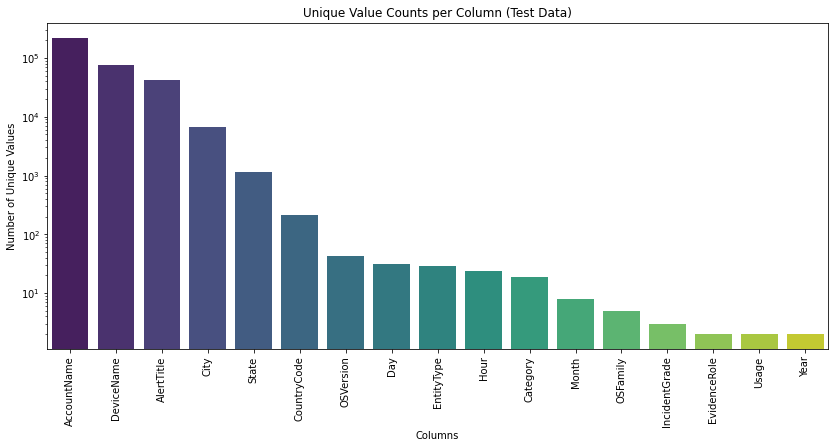

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute unique value counts per column in test_data
unique_counts = test_data.nunique().sort_values(ascending=False)

# Plot unique value counts
plt.figure(figsize=(14, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")

# Improve readability
plt.title('Unique Value Counts per Column (Test Data)')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.yscale('log')  # Use log scale for better visibility if high cardinality exists
plt.show()


In [95]:
test_data['AlertTitle'].value_counts()

0         606449
2         262061
1         215943
3         201900
4         185813
           ...  
103606         1
104456         1
100608         1
111600         1
111791         1
Name: AlertTitle, Length: 42265, dtype: int64

In [96]:
test_data['City'].value_counts()

10630    3625785
0          44651
1          11673
2          10456
3           7106
          ...   
5982           1
4446           1
8108           1
7861           1
9805           1
Name: City, Length: 6637, dtype: int64

In [97]:
train_data['IncidentGrade'].value_counts()

0    3020419
2    2115334
1    1443539
Name: IncidentGrade, dtype: int64

In [98]:
# ✅ Step 2: Check High Missing Value Columns (Threshold 50%)
missing_percentage = test_data.isnull().mean() * 100
high_missing_columns = missing_percentage[missing_percentage > 50].index.tolist()

# ✅ Step 3: Identify Low-Variance Features
numeric_features = test_data.select_dtypes(include=['number'])
if not numeric_features.empty:
    selector = VarianceThreshold(threshold=0.01)  # Remove features with variance <0.01
    selector.fit(numeric_features)
    low_variance_columns = numeric_features.columns[~selector.get_support()].tolist()
else:
    low_variance_columns = []

# ✅ Step 4: Drop Only Existing Columns
drop_columns = list(set(id_columns + high_missing_columns + low_variance_columns))
existing_columns_to_drop = [col for col in drop_columns if col in test_data.columns]

if existing_columns_to_drop:
    test_data.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"📉 Dropped {len(existing_columns_to_drop)} features with minimal importance.")
else:
    print("✅ No unnecessary features found in test_data.")

print(f"✅ Remaining features in test_data: {test_data.shape[1]}")

📉 Dropped 1 features with minimal importance.
✅ Remaining features in test_data: 16


In [99]:
print(test_data.columns)
test_data.shape

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'AccountName', 'DeviceName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage', 'Month', 'Day', 'Hour'],
      dtype='object')


(3922695, 16)

In [100]:
test_data.head()


,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,AccountName,DeviceName,OSFamily,OSVersion,CountryCode,State,City,Usage,Month,Day,Hour
0,563,LateralMovement,BenignPositive,User,Impacted,863,153085,5,66,242,1445,10630,Private,6,4,22
1,2,CommandAndControl,BenignPositive,Machine,Impacted,453297,2833,0,0,242,1445,10630,Public,6,3,12
2,10807,LateralMovement,BenignPositive,Process,Related,453297,153085,5,66,242,1445,10630,Public,6,8,3
3,0,InitialAccess,FalsePositive,CloudLogonSession,Related,453297,153085,5,66,242,1445,10630,Public,6,12,12
4,18,Discovery,BenignPositive,User,Impacted,136104,153085,5,66,242,1445,10630,Public,6,6,17


In [101]:
test_data.describe()


,AlertTitle,AccountName,DeviceName,OSFamily,OSVersion,CountryCode,State,City,Month,Day,Hour
count,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06
mean,2.673215e+03,3.585862e+05,1.410906e+05,4.893778e+00,6.459252e+01,2.210860e+02,1.338802e+03,9.840989e+03,5.901661e+00,9.689893e+00,1.222813e+01
std,1.071732e+04,1.737347e+05,3.967719e+04,7.194654e-01,9.525676e+00,6.666060e+01,3.721316e+02,2.766539e+03,3.008862e-01,6.321079e+00,6.746927e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,4.532970e+05,1.530850e+05,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,6.000000e+00,5.000000e+00,7.000000e+00
50%,1.100000e+01,4.532970e+05,1.530850e+05,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,6.000000e+00,8.000000e+00,1.300000e+01
75%,1.470000e+02,4.532970e+05,1.530850e+05,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,6.000000e+00,1.200000e+01,1.800000e+01
max,1.131690e+05,4.532970e+05,1.530850e+05,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,1.200000e+01,3.100000e+01,2.300000e+01


In [102]:
test_data.dtypes

AlertTitle          int32
Category           object
IncidentGrade    category
EntityType         object
EvidenceRole     category
AccountName         int32
DeviceName          int32
OSFamily             int8
OSVersion            int8
CountryCode         int16
State               int16
City                int16
Usage            category
Month               int64
Day                 int64
Hour                int64
dtype: object

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 📌 Step 1: Convert All Categorical Columns to String Before Encoding
def convert_categorical_to_string(df, categorical_cols):
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype(str)  # Convert to string to avoid mixed types
    return df

# 📌 Step 2: Define Categorical Columns for test_data
categorical_columns = ['AlertTitle', 'Category', 'EntityType', 'EvidenceRole',
                       'AccountName', 'DeviceName', 'OSFamily', 
                       'CountryCode', 'State', 'City', 'Month', 'Day', 'Hour']

# Convert categorical columns to string format in test_data
test_data = convert_categorical_to_string(test_data, categorical_columns)

# 📌 Step 3: Group Less Frequent Categories into "Others"
columns_to_group = ['AlertTitle', 'AccountName', 'DeviceName', 'CountryCode', 'State', 'City']
for column in columns_to_group:
    if column in test_data.columns:
        category_counts = test_data[column].value_counts()
        top_categories = category_counts.nlargest(5).index  # Keep only top 5 categories
        test_data[column] = test_data[column].where(test_data[column].isin(top_categories), 'Others')

# Fill missing values if any
test_data[columns_to_group] = test_data[columns_to_group].fillna('Others')

# 📌 Step 4: Label Encode Ordinal Categorical Variables
encoding_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']
label_encoder = LabelEncoder()
for col in encoding_columns:
    if col in test_data.columns:
        test_data[col] = label_encoder.fit_transform(test_data[col].astype(str))  # Convert to string before encoding

# 📌 Step 5: Convert Grouped Categorical Features into Label Encoding
for col in columns_to_group:
    if col in test_data.columns:
        test_data[col] = label_encoder.fit_transform(test_data[col].astype(str))  # Convert to string before encoding

# 📌 Step 6: Apply One-Hot Encoding to Remaining Categorical Features
one_hot_columns = [col for col in categorical_columns if col in test_data.columns and col not in encoding_columns and col not in columns_to_group]
test_data = pd.get_dummies(test_data, columns=one_hot_columns, drop_first=True)

# 📌 Step 7: Verify Transformed Data
print("✅ Transformed `test_data` shape:", test_data.shape)
print("✅ Sample of Transformed `test_data`:")
print(test_data.head())


✅ Transformed `test_data` shape: (3922695, 76)
✅ Sample of Transformed `test_data`:
   AlertTitle  Category  IncidentGrade  EntityType  EvidenceRole  AccountName  \
0           5        11              0          28             0            5   
1           2         1              0          15             0            4   
2           5        11              0          23             1            4   
3           0        10              1           7             1            4   
4           5         5              0          28             0            5   

   DeviceName  OSVersion  CountryCode  State  ...  Hour_21 Hour_22  Hour_23  \
0           2         66            3      2  ...        0       1        0   
1           5          0            3      2  ...        0       0        0   
2           2         66            3      2  ...        0       0        0   
3           2         66            3      2  ...        0       0        0   
4           2         66          

In [104]:
test_data.shape

(3922695, 76)

In [105]:
# Columns of both datasets
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Difference columns
print("Columns in Train but not in Test:", train_columns - test_columns)
print("Columns in Test but not in Train:", test_columns - train_columns)

Columns in Train but not in Test: {'Day_15.0', 'Day_12.0', 'Url', 'Day_5.0', 'Day_6.0', 'Day_2.0', 'Day_13.0', 'Day_14.0', 'Day_16.0', 'Day_4.0', 'Day_9.0', 'Day_11.0', 'Day_7.0', 'Day_8.0', 'Day_3.0'}
Columns in Test but not in Train: {'Day_19', 'Day_28', 'Day_14', 'Day_27', 'Month_11', 'Day_13', 'Month_5', 'Day_4', 'OSFamily_3', 'Day_29', 'OSFamily_2', 'Day_31', 'Day_23', 'OSVersion', 'Day_16', 'Month_6', 'Day_26', 'Day_21', 'Day_22', 'Day_24', 'Day_9', 'Day_15', 'Day_20', 'Day_7', 'Day_11', 'Day_5', 'Day_12', 'Day_6', 'Day_25', 'OSFamily_5', 'Day_10', 'Month_12', 'Day_2', 'Day_3', 'OSFamily_1', 'Month_4', 'Day_18', 'Day_30', 'Month_2', 'Month_3', 'Day_8', 'Usage', 'Day_17'}


In [106]:
import pandas as pd

# 📌 Identify Columns to Drop (Not Present in `train_data`)
extra_columns = set(test_data.columns) - set(train_data.columns)

# 📌 Drop Extra Columns
test_data.drop(columns=extra_columns, inplace=True, errors='ignore')

# 📌 Identify Missing Columns in `test_data` (Present in `train_data`)
missing_cols = set(train_data.columns) - set(test_data.columns)

# 📌 Add Missing Columns with Default Value (0)
for col in missing_cols:
    test_data[col] = 0

# 📌 Verify Alignment
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

print("✅ Columns in Train but not in Test (After Fixing):", train_columns - test_columns)
print("✅ Columns in Test but not in Train (After Fixing):", test_columns - train_columns)

# 📌 Final Shape After Fix
print(f"✅ Final `test_data` shape: {test_data.shape}")


✅ Columns in Train but not in Test (After Fixing): set()
✅ Columns in Test but not in Train (After Fixing): set()
✅ Final `test_data` shape: (3922695, 48)


In [107]:
test_data.shape

(3922695, 48)

In [108]:
train_data.shape

(6579292, 48)

In [109]:
print("Target column in Train:", 'IncidentGrade' in train_data.columns)
print("Target column in Test:", 'IncidentGrade' in test_data.columns)

Target column in Train: True
Target column in Test: True


In [111]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922695 entries, 0 to 4147990
Data columns (total 48 columns):
 #   Column         Dtype
---  ------         -----
 0   AlertTitle     int32
 1   Category       int32
 2   IncidentGrade  int32
 3   EntityType     int32
 4   EvidenceRole   int32
 5   AccountName    int32
 6   DeviceName     int32
 7   CountryCode    int32
 8   State          int32
 9   City           int32
 10  Hour_1         uint8
 11  Hour_10        uint8
 12  Hour_11        uint8
 13  Hour_12        uint8
 14  Hour_13        uint8
 15  Hour_14        uint8
 16  Hour_15        uint8
 17  Hour_16        uint8
 18  Hour_17        uint8
 19  Hour_18        uint8
 20  Hour_19        uint8
 21  Hour_2         uint8
 22  Hour_20        uint8
 23  Hour_21        uint8
 24  Hour_22        uint8
 25  Hour_23        uint8
 26  Hour_3         uint8
 27  Hour_4         uint8
 28  Hour_5         uint8
 29  Hour_6         uint8
 30  Hour_7         uint8
 31  Hour_8         uint8
 32

In [112]:
test_data.describe()


,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,AccountName,DeviceName,CountryCode,State,City,...,Day_2.0,Day_13.0,Day_14.0,Day_16.0,Day_4.0,Day_9.0,Day_11.0,Day_7.0,Day_8.0,Day_3.0
count,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,...,3922695.0,3922695.0,3922695.0,3922695.0,3922695.0,3922695.0,3922695.0,3922695.0,3922695.0,3922695.0
mean,3.656074e+00,8.872445e+00,9.469533e-01,1.686761e+01,5.408781e-01,4.229992e+00,2.260689e+00,3.002762e+00,2.138851e+00,2.151112e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.947862e+00,3.907798e+00,8.807276e-01,7.835377e+00,4.983262e-01,4.728045e-01,8.484898e-01,6.533766e-01,7.200425e-01,7.397816e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000e+00,7.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.000000e+00,1.000000e+01,1.000000e+00,1.500000e+01,1.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.000000e+00,1.000000e+01,2.000000e+00,2.700000e+01,1.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.000000e+00,1.800000e+01,2.000000e+00,2.800000e+01,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Saving the Cleaned Test Data set as CSV for further processing

In [113]:
print(train_data.shape)
print(test_data.shape)

(6579292, 48)
(3922695, 48)


In [114]:
train_data, test_data = train_data.align(test_data, join='left', axis=1)
test_data.fillna(0, inplace=True)

In [115]:
test_data.shape


(3922695, 48)

In [116]:
test_data = test_data.reset_index(drop=True)


In [118]:
import joblib
# Saveing the data using Joblib
joblib.dump(test_data, 'encoded_test_data.joblib')

['encoded_test_data.joblib']

In [119]:
# Loading the data using Joblib
test_data = joblib.load('encoded_test_data.joblib')

In [120]:
test_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Url,AccountName,DeviceName,CountryCode,State,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,5,11,0,28,0,0,5,2,3,2,...,0,1,0,0,0,0,0,0,0,0
1,2,1,0,15,0,0,4,5,3,2,...,0,0,0,0,0,0,0,0,0,0
2,5,11,0,23,1,0,4,2,3,2,...,0,0,0,1,0,0,0,0,0,0
3,0,10,1,7,1,0,4,2,3,2,...,0,0,0,0,0,0,0,0,0,0
4,5,5,0,28,0,0,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0


In [121]:
test_data.to_csv("final_test_data.csv",index=False)


In [123]:
print(test_data.memory_usage(deep=True).sum() / (1024 ** 2), "MB")


684.5982675552368 MB


In [127]:
test_data

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Url,AccountName,DeviceName,CountryCode,State,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,5,11,0,28,0,0,5,2,3,2,...,0,1,0,0,0,0,0,0,0,0
1,2,1,0,15,0,0,4,5,3,2,...,0,0,0,0,0,0,0,0,0,0
2,5,11,0,23,1,0,4,2,3,2,...,0,0,0,1,0,0,0,0,0,0
3,0,10,1,7,1,0,4,2,3,2,...,0,0,0,0,0,0,0,0,0,0
4,5,5,0,28,0,0,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922690,5,12,0,15,0,0,4,3,3,2,...,0,0,0,0,0,0,0,0,0,0
3922691,5,10,0,28,0,0,5,2,3,2,...,0,0,0,1,0,0,0,0,0,0
3922692,5,10,0,28,0,0,5,2,3,2,...,0,0,0,0,0,0,0,0,0,0
3922693,5,1,1,12,1,0,4,2,3,2,...,0,0,0,0,0,0,0,0,0,0
